In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
subjCols = ['Average Score (SAT Math)', 'Average Score (SAT Reading)', 'Average Score (SAT Writing)']
raceCols = ['Percent Black', 'Percent White', 'Percent Asian', 'Percent Hispanic']
neededCols = [raceCols[:1][0], 'Average Score (SAT Math)']
scores = pd.read_csv('scores.csv')
scores.drop(scores.columns.difference(subjCols + raceCols), 1, inplace=True)
for col in neededCols:
                scores = scores[pd.notnull(scores[col])]
for index, row in scores.iterrows():
    for col in raceCols:
            scores.at[index, col] = float(row[col].strip('%'))
            
for col in raceCols:
        scores[col] = scores[col].apply(pd.to_numeric, errors="coerce")


In [147]:
def plot_corr(df, size=10):
    corr = df.corr()
    fix, ax = plt.subplots(figsize=(size, size))
    ax.set_xticks(np.arange(5)) # center x ticks
    ax.set_yticks(np.arange(5)) # center y ticks
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
    plt.yticks(range(len(corr.columns)), corr.columns)
    ax.matshow(corr, cmap="Blues")     
    plt.tight_layout()
    plt.savefig('matrix.svg', format="svg")

Percent White                  float64
Percent Black                  float64
Percent Hispanic               float64
Percent Asian                  float64
Average Score (SAT Math)       float64
Average Score (SAT Reading)    float64
Average Score (SAT Writing)    float64
dtype: object

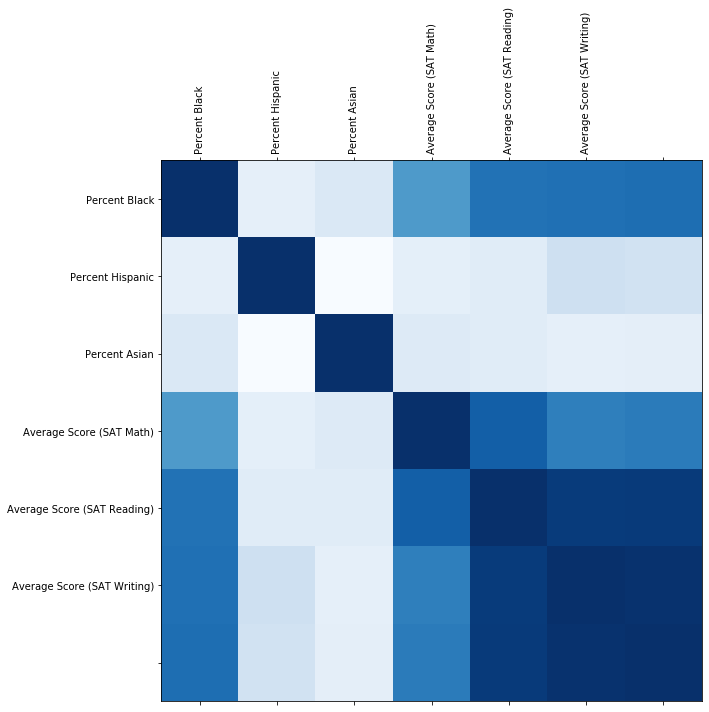

In [148]:
plot_corr(scores)
scores.dtypes